<a href="https://colab.research.google.com/github/yoadeoye/yoadeoye/blob/main/Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive #mounting the google collab drive
drive.mount('gdrive')

Mounted at gdrive


In [2]:
# impoting our modules into google colab
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [8]:
# importing our dataset from gdrive
houseData=pd.read_csv("/content/gdrive/MyDrive/kc_house_data.csv")
houseData.head()
initial_zip=houseData['zipcode']  # initial data series for zipcode as in csv

DATA CLEANING

In [ ]:
# checking the houseData
houseData.describe().head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,540088.141767,3.370842,2.114757,2079.899736,15106.967566,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,367127.196483,0.930062,0.770163,918.440897,41420.511515,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,75000.000000,0.000000,0.000000,290.000000,520.000000,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,321950.000000,3.000000,1.750000,1427.000000,5040.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000


In [ ]:
#checking data for null values
houseData.isnull().sum()   #no null values 

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:

#checking/deleting for duplicated values in data
houseData.drop_duplicates()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:

#reaffirming the cleaned duplicates
houseData.duplicated().sum() #0 nil

0

In [ ]:
#data information
houseData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:

houseData['bedrooms'].describe()

count    21613.000000
mean         3.370842
std          0.930062
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

In [ ]:
#changing the date format to its required format
houseData["date"]=pd.to_datetime(houseData["date"]) # changes the data type to datetime format
houseData['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21608   2014-05-21
21609   2015-02-23
21610   2014-06-23
21611   2015-01-16
21612   2014-10-15
Name: date, Length: 21613, dtype: datetime64[ns]

In [ ]:
houseData.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


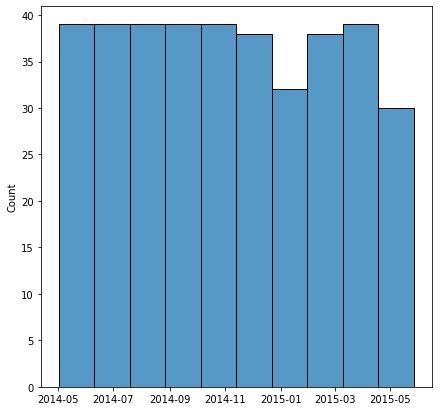

<Figure size 720x504 with 0 Axes>

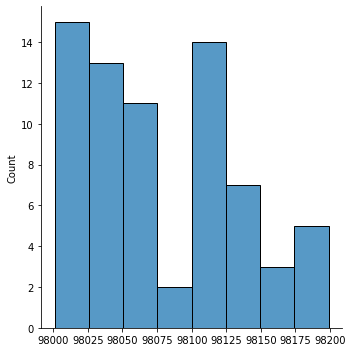

In [ ]:

# getting to know the location by their zip code 
#checking the distribution of the zipcode/date data either even or uneven
houseData['date'].unique()
plt.figure(figsize=[7,7],)
sns.histplot(x=houseData['date'].unique())


houseData['zipcode'].unique()
plt.figure(figsize=[10,7])
sns.displot(x=houseData['zipcode'].unique())

In [ ]:
# on column zip code 
houseData['zipcode'].unique().max() # 98199
houseData['zipcode'].unique().min() # 98001
houseData['zipcode'].unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039])

In [ ]:
# installing library on google colab
!pip install pgeocode   #---installed already


In [ ]:
# to change zip data to locations
import pgeocode 
zip_code=[]
zipcode=houseData['zipcode'].unique()
for i in range(len(zipcode)): # converting the zipcode to str data
  code=str(zipcode[i])
  zip_code.append(code)
zip_code
#for more info
#http://www.geonames.org/postalcode-search.html?q=98199&country=US
nomi=pgeocode.Nominatim('us')
zipcode_=nomi.query_postal_code(zip_code)
zipcode_  # dataframed column zip code



,postal_code,country_code,place_name,state_name,state_code,county_name,county_code,community_name,community_code,latitude,longitude,accuracy
0,98178,US,Seattle,Washington,WA,King,33.0,None,NaN,47.4924,-122.2359,4.0
1,98125,US,Seattle,Washington,WA,King,33.0,None,NaN,47.7170,-122.3015,4.0
2,98028,US,Kenmore,Washington,WA,King,33.0,None,NaN,47.7542,-122.2475,4.0
3,98136,US,Seattle,Washington,WA,King,33.0,None,NaN,47.5398,-122.3878,4.0
4,98074,US,Sammamish,Washington,WA,King,33.0,None,NaN,47.6254,-122.0462,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
65,98072,US,Woodinville,Washington,WA,King,33.0,None,NaN,47.7684,-122.1271,4.0
66,98188,US,Seattle,Washington,WA,King,33.0,None,NaN,47.4483,-122.2731,4.0
67,98014,US,Carnation,Washington,WA,King,33.0,None,NaN,47.6380,-121.9111,4.0
68,98055,US,Renton,Washington,WA,King,33.0,None,NaN,47.4648,-122.2075,4.0


In [ ]:
#scraping zipcode_
zipcode_.head()

,postal_code,country_code,place_name,state_name,state_code,county_name,county_code,community_name,community_code,latitude,longitude,accuracy
0,98178,US,Seattle,Washington,WA,King,33.0,None,NaN,47.4924,-122.2359,4.0
1,98125,US,Seattle,Washington,WA,King,33.0,None,NaN,47.7170,-122.3015,4.0
2,98028,US,Kenmore,Washington,WA,King,33.0,None,NaN,47.7542,-122.2475,4.0
3,98136,US,Seattle,Washington,WA,King,33.0,None,NaN,47.5398,-122.3878,4.0
4,98074,US,Sammamish,Washington,WA,King,33.0,None,NaN,47.6254,-122.0462,4.0


In [ ]:
#scraping of zipcode_
zipcode_.duplicated().sum()#0
zipcode_.isna().sum() #community_name 69 community_code    69


postal_code        0
country_code       0
place_name         0
state_name         0
state_code         0
county_name        0
county_code        0
community_name    70
community_code    70
latitude           0
longitude          0
accuracy           0
dtype: int64

In [ ]:
zipcode_.drop(['community_name','community_code'],axis=1,inplace=True)
zipcode_.head()

,postal_code,country_code,place_name,state_name,state_code,county_name,county_code,latitude,longitude,accuracy
0,98178,US,Seattle,Washington,WA,King,33.0,47.4924,-122.2359,4.0
1,98125,US,Seattle,Washington,WA,King,33.0,47.7170,-122.3015,4.0
2,98028,US,Kenmore,Washington,WA,King,33.0,47.7542,-122.2475,4.0
3,98136,US,Seattle,Washington,WA,King,33.0,47.5398,-122.3878,4.0
4,98074,US,Sammamish,Washington,WA,King,33.0,47.6254,-122.0462,4.0


In [ ]:
#rechecking zip code if all are Washington ,visit the link below for verification
#http://www.geonames.org/postalcode-search.html?q=98199&country=US
zip_code=[]
all(zipcode_['state_name'])=='Washington' #True 

True

In [ ]:
houseData.head(2) #rechecking house dataset

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


In [ ]:
# to replace data in houseData(zipcode) with zipcode_[place_name	state_name]
houseData['zipcode'].unique()  # houseData(zipcode) zipcode data
zipcode_['place_name']   # zipcode_[place_name] all(state_name)='Washington'
houseData.replace(houseData['zipcode'].unique(),zipcode_['place_name'],inplace=True)


In [ ]:
#review dataset
houseData.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,Seattle,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,Seattle,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,Kenmore,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,Seattle,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,Sammamish,47.6168,-122.045,1800,7503


In [ ]:
houseData.tail(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,Issaquah,47.5345,-122.069,1410,1287
21612,1523300157,2014-10-15,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,Seattle,47.5941,-122.299,1020,1357


In [ ]:
initial_zip.head(2)  # from csv

0    98178
1    98125
Name: zipcode, dtype: int64

In [ ]:
final_zip=houseData['zipcode']
final_zip.head(2)

0    Seattle
1    Seattle
Name: zipcode, dtype: object

In [ ]:
houseData.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,Seattle,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,Seattle,47.7210,-122.319,1690,7639


In [ ]:

#changing the column name(zipcode=Location)
new_columns=['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'Location',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']
new_columns1=['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'Location','State Name','zip code',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']
houseData=pd.DataFrame(houseData,columns=new_columns)
houseData['Location']=houseData['Location'].fillna(final_zip) #filling up Nan with its code name 
houseData['zip code']=initial_zip  # adding another column for zipcode
houseData['State Name']='Washington' # adding another column for the state_name
houseData['date']=pd.to_datetime(houseData['date'])
houseData[new_columns1]
houseData.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,Location,lat,long,sqft_living15,sqft_lot15,zip code,State Name
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,Seattle,47.5112,-122.257,1340,5650,98178,Washington
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,Seattle,47.7210,-122.319,1690,7639,98125,Washington
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,Kenmore,47.7379,-122.233,2720,8062,98028,Washington
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,Seattle,47.5208,-122.393,1360,5000,98136,Washington
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,Sammamish,47.6168,-122.045,1800,7503,98074,Washington


In [ ]:
houseData.isna().sum() #0
houseData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

### houseData VISUALIZATION

*  Distribution of house prices
*  No of bedrooms and Bathrooms
*  Price as related to bedrooms/bathrooms
*  Price as related to locations per year 





/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


       Distribution of Prices


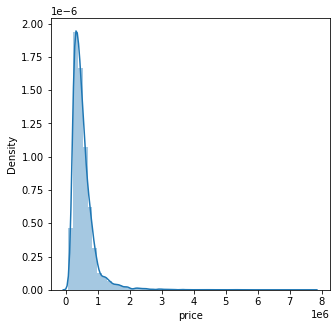

In [ ]:
#Distribution of house prices
fig=plt.figure(figsize=[5,5])
sns.distplot(houseData['price'])  # outliers present
print('       Distribution of Prices')


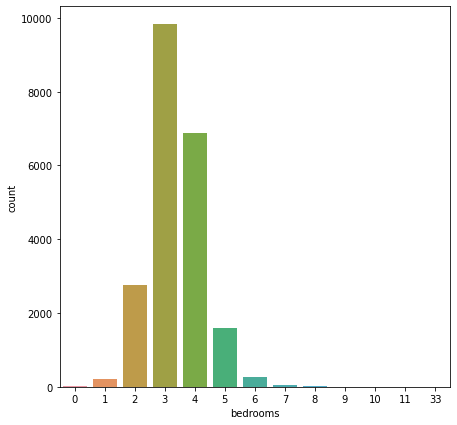

In [ ]:
# No of bedrooms and Bathrooms
fig=plt.figure(figsize=[7,7])
sns.countplot(x=houseData['bedrooms'],data=houseData) # outliers present

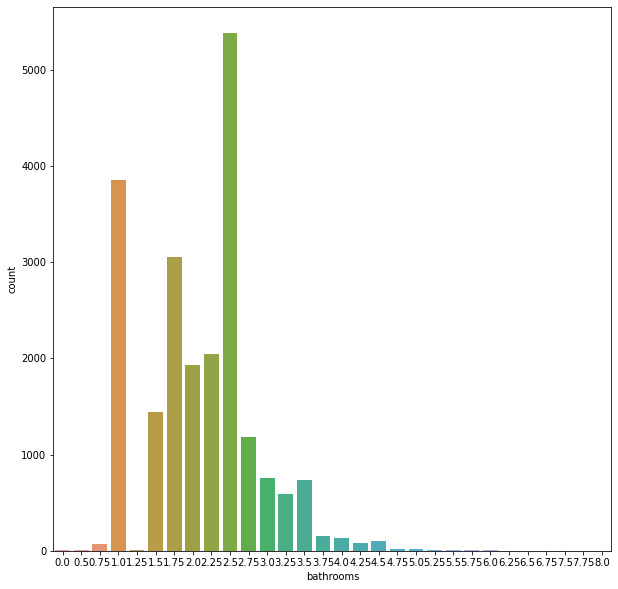

In [ ]:
plt.figure(figsize=[10,10])
sns.countplot(x=houseData['bathrooms'],data=houseData)  # outliers present


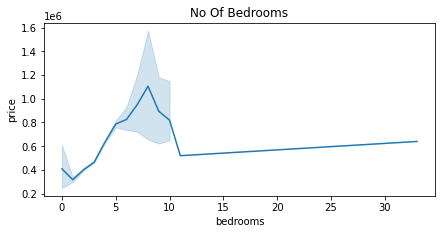

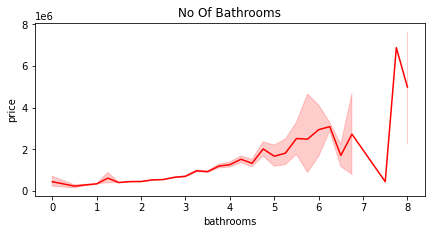

In [ ]:
# Price as related to bedrooms/bathrooms
plt.figure(figsize=[7,7]).add_subplot(211).set_title('No Of Bedrooms')
sns.lineplot(x=houseData['bedrooms'],y=houseData['price'],data=houseData,legend='full')
plt.figure(figsize=[7,7]).add_subplot(212).set_title('No Of Bathrooms')
sns.lineplot(x=houseData['bathrooms'],y=houseData['price'],data=houseData,legend='full',color='r')


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


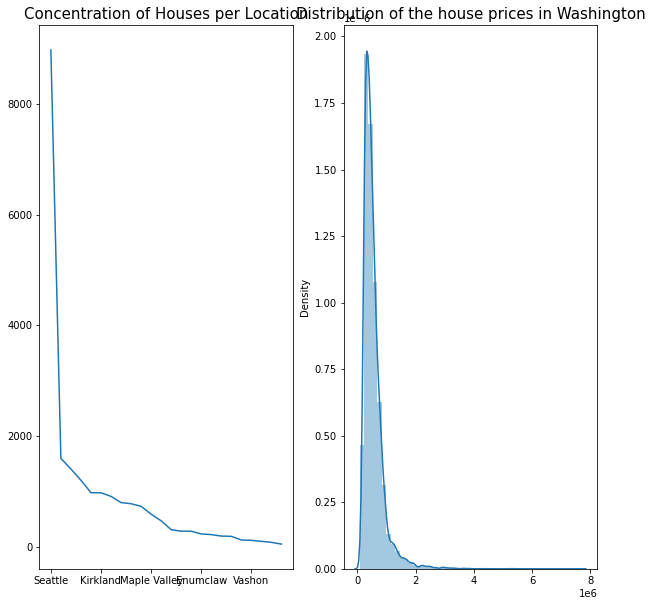

In [ ]:
# Price as related to locations per year
fig=plt.figure(figsize=[10,10])
fig.add_subplot(121).set_title("Concentration of Houses per Location",fontsize=15)
houseData['Location'].value_counts().plot()
fig.add_subplot(122).set_title('Distribution of the house prices in Washington',fontsize=15,loc='center')
sns.distplot(x=houseData['price'])

From the above we can deduce that houses are more sold in seattle as compared to other locations within Washington,USA between 2014 and 2015

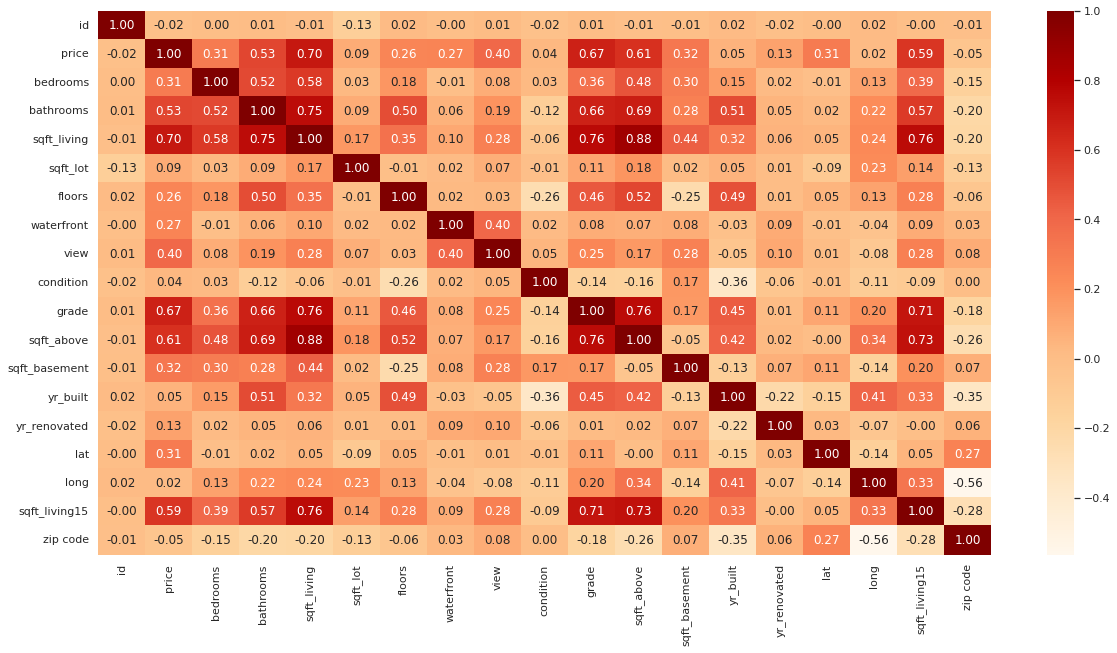

In [ ]:
#visualizing column and row correlation
sns.set()
plt.figure(figsize=(20,10))
sns.heatmap(houseData.corr(),annot=True,fmt='.2f',cmap='OrRd')
plt.show()

In [ ]:
cor=houseData.corr()
cor['price']
# price will be compared with grade&sqft_above with over 60% correlation

id              -0.016762
price            1.000000
bedrooms         0.308350
bathrooms        0.525138
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
lat              0.307003
long             0.021626
sqft_living15    0.585379
zip code        -0.053203
Name: price, dtype: float64

PRICE AS DEPENDENT ON THE GRADE AND SQFT ABOVE


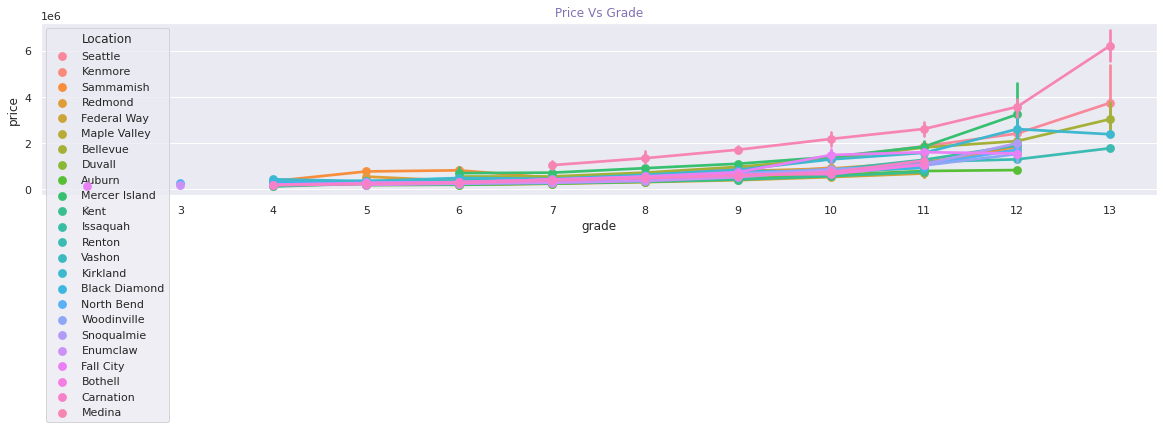

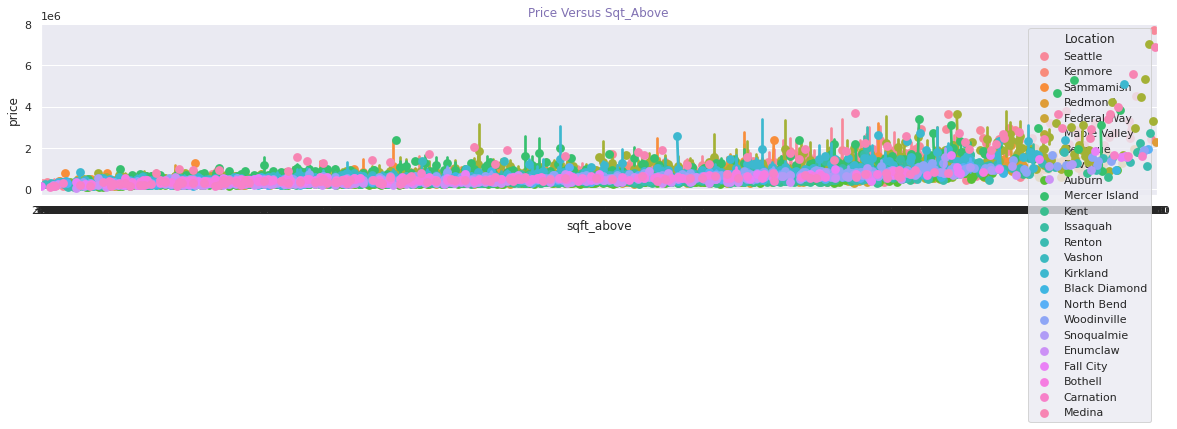

In [ ]:
print('Price as dependent on the Grade and Sqft Above'.upper())
sns.set()
labels={'title': 'Price Vs Grade',
        'title2': 'Price Versus Sqt_Above'
    
}
ax1=plt.figure(figsize=[20,7]).add_subplot(211)
sns.pointplot(x=houseData['grade'],y=houseData['price'],hue=houseData['Location'],data=houseData)
ax1.set_title(labels['title'],fontsize=12,color='m',loc='center')
ax=plt.figure(figsize=[20,7]).add_subplot(212)
sns.pointplot(x=houseData['sqft_above'],y=houseData['price'],hue=houseData['Location'],data=houseData)
ax.set_title(labels['title2'],fontsize=12,color='m',loc='center')

plt.show()
  

INSIGHTS
1.   The grade has a high correlation with house price as price increases with the grade
2.   Also people tend to buy houses in Seattle more than other locations





In [ ]:
houseData['Location'].value_counts()

Seattle          8977
Renton           1597
Bellevue         1407
Kent             1203
Redmond           979
Kirkland          977
Auburn            912
Sammamish         800
Federal Way       779
Issaquah          733
Maple Valley      590
Woodinville       471
Snoqualmie        310
Kenmore           283
Mercer Island     282
Enumclaw          234
North Bend        221
Bothell           195
Duvall            190
Carnation         124
Vashon            118
Black Diamond     100
Fall City          81
Medina             50
Name: Location, dtype: int64

In [ ]:
houseData['year']=houseData['date'].apply(lambda date:date.year)
houseData['month']=houseData['date'].apply(lambda date:date.month)

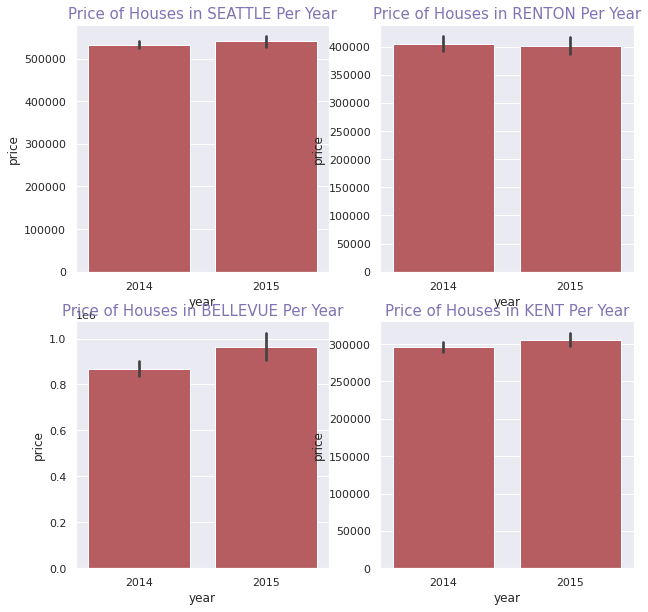

In [ ]:
#picking the location with the highest data counts
sns.set()
seattle_cp=houseData[houseData['Location']=='Seattle']['price']
renton_cp=houseData[houseData['Location']=='Renton']['price']
bellevue_cp=houseData[houseData['Location']=='Bellevue']['price']
kent_cp=houseData[houseData['Location']=='Kent']['price']
col=[seattle_cp,renton_cp,bellevue_cp,kent_cp]
nam=['Seattle','Renton','Bellevue','Kent']
plt.figure(figsize=[10,10])
for i,dat in enumerate(col):
  ax=plt.subplot(2,2,i+1)
  sns.barplot(x=houseData['year'],y=col[i],data=houseData,color='r')
  ax.set_title(f'Price of Houses in {nam[i].upper()} Per Year',fontsize=15,color='m',loc='center')
  plt.tight_layout

plt.show()


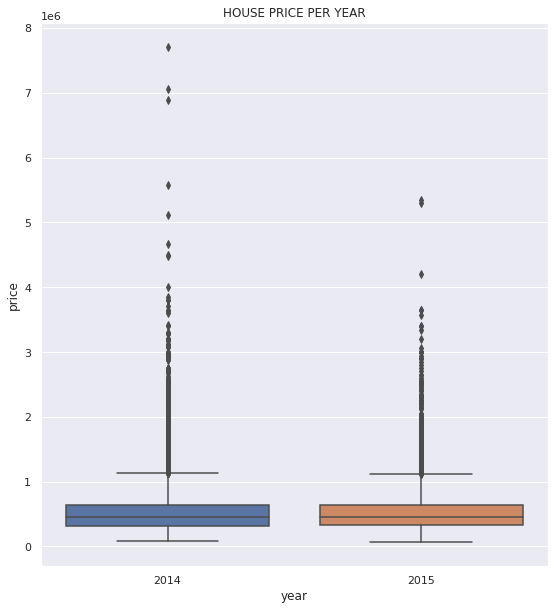

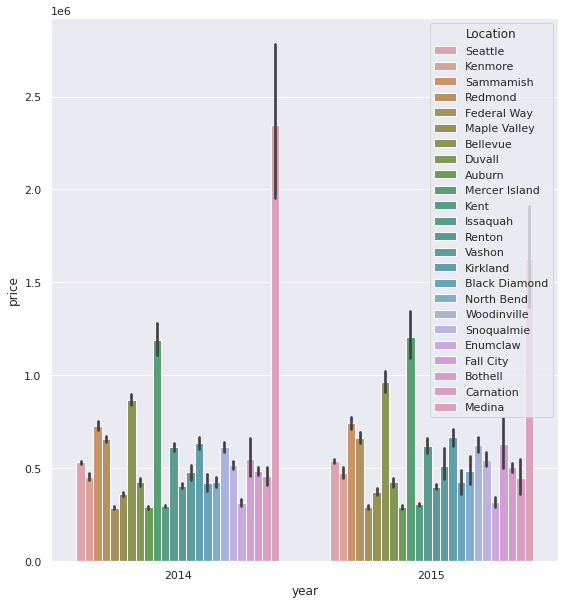

In [ ]:
# for the price per year and location in view
sns.set()
plt.figure(figsize=[20,10]).add_subplot(121).set_title('House Price Per Year'.upper())
sns.boxplot(x=houseData['year'],y=houseData['price'],data=houseData)
plt.figure(figsize=[20,10]).add_subplot(122)
sns.barplot(x=houseData['year'],y=houseData['price'],hue=houseData['Location'],data=houseData,saturation=0.5)
plt.tight_layout
plt.show()

#calculating the difference in price change btw 2014 and 2015





In [ ]:
p_2014=houseData[houseData['year']==2014]
p_2014=p_2014['price'].sum()
p_2015=houseData[houseData['year']==2015]
p_2015=p_2015['price'].sum()
print('Increment in house prices from 2014 to 2015 is :', ((p_2014-p_2015)/p_2014)*100)


Increment in house prices from 2014 to 2015 is : 52.05121671943396


INSIGHTS

*   The price of house in Washington DC,USA generally decreased  by 50% in 2015



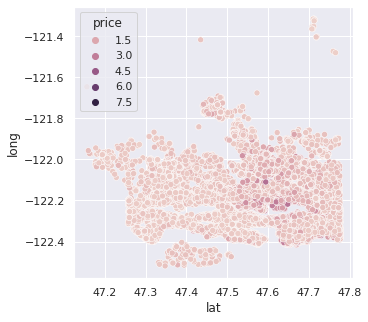

In [ ]:
#lat and #longitude relationship
plt.figure(figsize=[5,5],frameon=False)
sns.scatterplot(x=houseData['lat'],y=houseData['long'],hue=houseData['price'],data=houseData,color='m')
# insights : a particular location within a city is more considered

In [ ]:
houseData.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'Location',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'zip code', 'State Name',
       'year', 'month'],
      dtype='object')

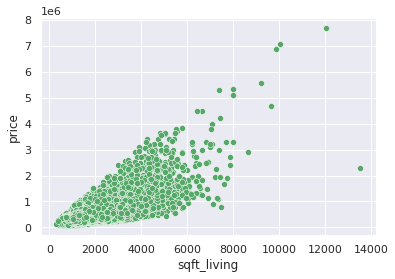

In [ ]:
# relationship between the square fit and price
sns.scatterplot(x=houseData['sqft_living'],y=houseData['price'],data=houseData,color='g')

FEATURE ENGINEERING

In [14]:
houseData.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [15]:
y=houseData.price
X=houseData.drop(columns=['date','id','price','sqft_lot15'])

In [16]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800


In [17]:
X.head(2)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690


In [18]:
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [19]:
# Splitting and scaling the data into training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [21]:
[X_train.shape ,X_test.shape]

[(15129, 17), (6484, 17)]

In [23]:
#TENSOR FLOW
from tensorflow.keras import Sequential #basic feed forward model
from tensorflow.keras.layers import Dense
model=Sequential()
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')  #builds the ,model for the first time

In [24]:
from tensorflow.keras.callbacks import EarlyStopping
earlystop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [ ]:
start_time=time.time()
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),callbacks=earlystop,batch_size=128,epochs=1000) #fitting the models to our variables with 1000 iterations ## train the model
end_time=time.time()
print('Cell/Model Runtime: ',end_time-start_time,end=' ')

In [ ]:
losses=pd.DataFrame(model.history.history)
losses.plot()

In [35]:
prediction=model.predict(X_test)  #make predictions with zero losses
prediction

array([[ 425002.28],
       [ 785131.06],
       [1272388.5 ],
       ...,
       [ 331964.47],
       [ 945548.56],
       [ 521073.4 ]], dtype=float32)

In [69]:
# Evaluating the model by scoring

from sklearn.metrics import explained_variance_score,mean_absolute_error,confusion_matrix,accuracy_score
#explained_variance_score
print('explained_variance_score : '.upper(),end='\033[94m{}\033[00m'.format(explained_variance_score(y_test,prediction)))
print('\r')
#mean_absolute_error
print('mean_absolute_error :'.upper(),end=' \033[96m{}\033[00m'.format(round(mean_absolute_error(y_test,prediction),2)))

EXPLAINED_VARIANCE_SCORE : 0.8529694406632939
MEAN_ABSOLUTE_ERROR : 82818.53

In [93]:
prediction

array([[ 425002.28],
       [ 785131.06],
       [1272388.5 ],
       ...,
       [ 331964.47],
       [ 945548.56],
       [ 521073.4 ]], dtype=float32)

In [74]:
#the accuracy of the dataset tested and good